# Individual Recommender Systems for the X-Wines Dataset

# Loading the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Datasets: Wines and Ratings

In [2]:
dataset_folder = 'dataset'

wines_file = os.path.join(dataset_folder, 'XWines_Slim_1K_wines.csv')
wines_df = pd.read_csv(wines_file, index_col='WineID') # index_col='WineID' makes WineID the index of the dataframe

ratings_file = os.path.join(dataset_folder, 'XWines_Slim_150K_ratings.csv')
ratings_df = pd.read_csv(ratings_file, index_col='RatingID') # index_col='RatingID' makes RatingID the index of the dataframe

/var/folders/9n/hfw66rw97sl45x98mmd_vs4r0000gn/T/ipykernel_72627/3464494200.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings_df = pd.read_csv(ratings_file, index_col='RatingID') # index_col='RatingID' makes RatingID the index of the dataframe


In [3]:
display(ratings_df.head())

,UserID,WineID,Vintage,Rating,Date
RatingID,,,,,
143,1356810,103471,1950,4.5,2021-11-02 20:52:59
199,1173759,111415,1951,5.0,2015-08-20 17:46:26
348,1164877,111395,1952,5.0,2020-11-13 05:40:26
374,1207665,111433,1953,5.0,2017-05-05 06:44:13
834,1075841,111431,1955,5.0,2016-09-14 20:18:38


In [4]:
# Checking how many unique Rating we have and sort it in ascending order
ratings_df['Rating'].unique() # We don't have simply regression values, but only these 9 Possible Ratings the user can give

array([4.5, 5. , 4. , 2. , 3. , 1. , 3.5, 2.5, 1.5])

In [5]:
# Dropping the Date column, as we don't need it for now
ratings_df.drop(columns=['Date'], inplace=True)
display(ratings_df.head())

,UserID,WineID,Vintage,Rating
RatingID,,,,
143,1356810,103471,1950,4.5
199,1173759,111415,1951,5.0
348,1164877,111395,1952,5.0
374,1207665,111433,1953,5.0
834,1075841,111431,1955,5.0


In [6]:
display(wines_df.head())

,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Website,Vintages
WineID,,,,,,,,,,,,,,,,
100001,Espumante Moscatel,Sparkling,Varietal/100%,['Muscat/Moscato'],"['Pork', 'Rich Fish', 'Shellfish']",7.5,Medium-bodied,High,BR,Brazil,1001,Serra Gaúcha,10001,Casa Perini,http://www.vinicolaperini.com.br,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201..."
100002,Ancellotta,Red,Varietal/100%,['Ancellotta'],"['Beef', 'Barbecue', 'Codfish', 'Pasta', 'Pizz...",12.0,Medium-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10001,Casa Perini,http://www.vinicolaperini.com.br,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 200..."
100003,Cabernet Sauvignon,Red,Varietal/100%,['Cabernet Sauvignon'],"['Beef', 'Lamb', 'Poultry']",12.0,Full-bodied,High,BR,Brazil,1001,Serra Gaúcha,10002,Castellamare,https://www.emporiocastellamare.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
100005,Maison de Ville Cabernet-Merlot,Red,Assemblage/Bordeaux Red Blend,"['Cabernet Sauvignon', 'Merlot']","['Beef', 'Lamb', 'Game Meat', 'Poultry']",11.0,Full-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10000,Aurora,http://www.vinicolaaurora.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
100007,Do Lugar Moscatel Espumantes,Sparkling,Varietal/100%,['Muscat/Moscato Bianco'],"['Pork', 'Rich Fish', 'Shellfish']",7.5,Medium-bodied,High,BR,Brazil,1001,Serra Gaúcha,10012,Dal Pizzol,http://www.dalpizzol.com.br,"[2018, 2017, 2016, 2015, 2014, 2013, 2012, 201..."


In [7]:
# Dropping the Website column, as we don't need it for now
wines_df.drop(columns=['Website'], inplace=True)

In [8]:
# Checking how many unique values there are for column Code
wines_df['Code'].nunique()

31

In [9]:
# Checking how many unique values there are for Country
wines_df['Country'].nunique()

31

* We can see that having Code and Country is redundant. I will keep the Country column since it is more descriptive

In [10]:
# Dropping the Code column as it is redudant when we also have the Country column
wines_df.drop(columns=['Code'], inplace=True)

In [11]:
# Checking how many Unique values there are for the RegionID column
wines_df['RegionID'].nunique()

324

In [12]:
# Checking how many unique values there are for the RegionName column
wines_df['RegionName'].nunique()

324

* Once again we see that we do not need both a RegionID and RegionName

In [13]:
# Dropping the RegionID column as it is redudant when we also have the RegionName column
wines_df.drop(columns=['RegionID'], inplace=True)

In [14]:
# Checking how many Unique values there are for the WineryID column
wines_df['WineryID'].nunique()

792

In [15]:
# Checking how many unique values there are for the WineryName column
wines_df['WineryName'].nunique()

791

* Here we see something interesting. There are wineries with the same name (which makes sense considering tha ammount of different wines present)

In [16]:
display(wines_df.head())

,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Country,RegionName,WineryID,WineryName,Vintages
WineID,,,,,,,,,,,,,
100001,Espumante Moscatel,Sparkling,Varietal/100%,['Muscat/Moscato'],"['Pork', 'Rich Fish', 'Shellfish']",7.5,Medium-bodied,High,Brazil,Serra Gaúcha,10001,Casa Perini,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201..."
100002,Ancellotta,Red,Varietal/100%,['Ancellotta'],"['Beef', 'Barbecue', 'Codfish', 'Pasta', 'Pizz...",12.0,Medium-bodied,Medium,Brazil,Serra Gaúcha,10001,Casa Perini,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 200..."
100003,Cabernet Sauvignon,Red,Varietal/100%,['Cabernet Sauvignon'],"['Beef', 'Lamb', 'Poultry']",12.0,Full-bodied,High,Brazil,Serra Gaúcha,10002,Castellamare,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
100005,Maison de Ville Cabernet-Merlot,Red,Assemblage/Bordeaux Red Blend,"['Cabernet Sauvignon', 'Merlot']","['Beef', 'Lamb', 'Game Meat', 'Poultry']",11.0,Full-bodied,Medium,Brazil,Serra Gaúcha,10000,Aurora,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
100007,Do Lugar Moscatel Espumantes,Sparkling,Varietal/100%,['Muscat/Moscato Bianco'],"['Pork', 'Rich Fish', 'Shellfish']",7.5,Medium-bodied,High,Brazil,Serra Gaúcha,10012,Dal Pizzol,"[2018, 2017, 2016, 2015, 2014, 2013, 2012, 201..."


In [17]:
# Checking how many WineName unique there are (I suspect there will be some repeated)
wines_df['WineName'].nunique()

803

In [18]:
# Checking how many unique values for WineID there are
wines_df.index.nunique()

1007

In [19]:
# Checking the different wine types (Type column)
wines_df['Type'].unique()

array(['Sparkling', 'Red', 'White', 'Dessert/Port', 'Dessert', 'Rosé'],
      dtype=object)

* Another interesting fact: Many more Unique Wines compared to names, since some Wines are named the same

In [20]:
# Checking the different Elaborate
wines_df['Elaborate'].unique()

array(['Varietal/100%', 'Assemblage/Bordeaux Red Blend',
       'Assemblage/Blend', 'Assemblage/Portuguese White Blend',
       'Assemblage/Port Blend', 'Assemblage/Portuguese Red Blend',
       'Varietal/>75%', 'Assemblage/Champagne Blend',
       'Assemblage/Rhône Red Blend', 'Assemblage/Provence Rosé Blend',
       'Assemblage/Priorat Red Blend',
       'Assemblage/Valpolicella Red Blend', 'Assemblage/Tuscan Red Blend'],
      dtype=object)

In [21]:
# Checking the different ABV
wines_df['ABV'].nunique()

76

* As suspected, the Alcohol level is indeed a Float, a numeric Feature

In [22]:
# Checking the unique Body
wines_df['Body'].unique()

array(['Medium-bodied', 'Full-bodied', 'Very light-bodied',
       'Very full-bodied', 'Light-bodied'], dtype=object)

In [23]:
# Checking the Unique Acidity
wines_df['Acidity'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [24]:
display(ratings_df.head())

,UserID,WineID,Vintage,Rating
RatingID,,,,
143,1356810,103471,1950,4.5
199,1173759,111415,1951,5.0
348,1164877,111395,1952,5.0
374,1207665,111433,1953,5.0
834,1075841,111431,1955,5.0


# Replicating Lab 1 for X-Wines

## Non-Personalized Recommender Systems

### Recomment the Top N Wines with the Highest Average Rating

In [25]:
# Checking the Data Type of the Rating column
ratings_df['Rating'].dtype

dtype('float64')

In [26]:
# Group by 'WineID' and compute the mean of the 'Rating' column
average_ratings_df = ratings_df.groupby('WineID')['Rating'].mean().reset_index()

# Sort the DataFrame by 'Rating' in descending order
sorted_avg_ratings_df = average_ratings_df.sort_values(by="Rating", ascending=False)

# Display the top 10 wines with the highest average rating
display(sorted_avg_ratings_df.head(10))


,WineID,Rating
831,182711,4.807692
481,144337,4.794118
819,181199,4.794118
717,174184,4.758488
258,112084,4.757212
809,180330,4.728261
827,182169,4.722222
189,111415,4.717333
837,183379,4.714286
821,181280,4.712500


In [27]:
joined_df = sorted_avg_ratings_df.join(wines_df, on='WineID')
display(joined_df[['WineID', 'WineName', 'Rating']].head(10))

,WineID,WineName,Rating
831,182711,Solari,4.807692
481,144337,Tre Soli Tre Grappa Invecchiata,4.794118
819,181199,Lauréne Pinot Noir,4.794118
717,174184,Grange,4.758488
258,112084,Oenothèque Brut Champagne,4.757212
809,180330,IX Estate Red,4.728261
827,182169,Fortis Cabernet Sauvignon,4.722222
189,111415,Pauillac (Premier Grand Cru Classé),4.717333
837,183379,Tychson Hill Vineyard Cabernet Sauvignon,4.714286
821,181280,Red Blend,4.712500


* Of course, what we did above simply gets the Wines with the Highest average Rating, without taking into consideration how many people have rated it this way.


In [28]:
# Step 1: Compute the count and average rating per WineID
average_ratings_df = ratings_df.groupby(['WineID']).agg(
    count=('UserID', 'size'),
    rating=('Rating', 'mean')
).reset_index()

# Step 2: Sort the wines by average rating in descending order
sorted_avg_ratings_df = average_ratings_df.sort_values(by="rating", ascending=False)

# Step 3: Join with wines_df to get WineName and other details
joined_df = sorted_avg_ratings_df.merge(wines_df, on='WineID', how='left')

# Step 4: Display the top 10 wines with their names, count of ratings, and average rating
display(joined_df[['WineName', 'count', 'rating']].head(10))


,WineName,count,rating
0,Solari,13,4.807692
1,Tre Soli Tre Grappa Invecchiata,17,4.794118
2,Lauréne Pinot Noir,17,4.794118
3,Grange,648,4.758488
4,Oenothèque Brut Champagne,208,4.757212
5,IX Estate Red,92,4.728261
6,Fortis Cabernet Sauvignon,18,4.722222
7,Pauillac (Premier Grand Cru Classé),750,4.717333
8,Tychson Hill Vineyard Cabernet Sauvignon,21,4.714286
9,Red Blend,40,4.712500


# Personalized Recommender Systems

## Content Based Recommender System

In [29]:
# Step 1: Import pandas and set display option
pd.set_option('display.float_format', '{:.2f}'.format)

# Assuming ratings_df is already loaded and contains the 'UserID' column

# Step 2: Compute the number of ratings per user
ratings_per_user = ratings_df.groupby('UserID').size()

# Step 3: Use describe() to get summary statistics
ratings_per_user_describe = ratings_per_user.describe()

# Step 4: Display the summary statistics
print("Summary Statistics of Ratings per User:")
print(ratings_per_user_describe)


Summary Statistics of Ratings per User:
count   10561.00
mean       14.20
std         7.04
min         1.00
25%        10.00
50%        12.00
75%        17.00
max        67.00
dtype: float64


In [30]:
# Selecting a Random user that has rated a number of movies equal to the mean
import random

# Assuming ratings_df is already loaded and contains the 'UserID' column

# Step 1: Compute the number of ratings per user
ratings_per_user = ratings_df.groupby('UserID').size()

# Step 2: Calculate the median number of ratings per user
mean_ratings = ratings_per_user.mean()
#mean_ratings = 221
print(f"The mean number of ratings per user is: {mean_ratings}")

# Step 3: Round the median to the nearest integer
mean_ratings_int = int(round(mean_ratings))
print(f"The mean number of ratings per user (rounded) is: {mean_ratings_int}")

# Step 4: Filter users with number of ratings equal to the median
users_with_median_ratings = ratings_per_user[ratings_per_user == mean_ratings_int]

# Step 5: Get the list of UserIDs with median number of ratings
user_ids_with_median_ratings = users_with_median_ratings.index.tolist()
num_users = len(user_ids_with_median_ratings)
print(f"Number of users with {mean_ratings_int} ratings: {num_users}")

# Step 6: Select a random UserID from the list
if user_ids_with_median_ratings:
    random_user_id = random.choice(user_ids_with_median_ratings)
    print(f"Random UserID with {mean_ratings_int} ratings (median number of ratings): {random_user_id}")
else:
    print(f"No users found with exactly {mean_ratings_int} ratings.")

# Optional Step: Examine the selected user's ratings
if 'random_user_id' in locals():
    user_ratings = ratings_df[ratings_df['UserID'] == random_user_id]
    print(f"\nRatings by User {random_user_id}:")
    print(user_ratings)

# 2027976


The mean number of ratings per user is: 14.203200454502415
The mean number of ratings per user (rounded) is: 14
Number of users with 14 ratings: 588
Random UserID with 14 ratings (median number of ratings): 1224439

Ratings by User 1224439:
           UserID  WineID Vintage  Rating
RatingID                                 
5045228   1224439  163493    2012    3.50
5619579   1224439  162525    2012    4.00
9163077   1224439  167418    2014    4.00
9382791   1224439  167429    2014    4.50
10886193  1224439  162721    2015    4.50
11104318  1224439  167445    2015    4.00
12045244  1224439  193486    2016    4.00
13722873  1224439  179027    2016    3.50
14500548  1224439  170984    2017    4.00
14875576  1224439  174177    2017    3.50
15747692  1224439  101576    2017    2.50
15973621  1224439  101651    2017    3.50
16269061  1224439  135861    2018    3.50
17528385  1224439  167767    2018    4.50


In [31]:
# Step 1: Ensure 'WineID' is set as the index in wines_df for efficient lookup
if wines_df.index.name != 'WineID':
    wines_df.set_index('WineID', inplace=True)

# Step 2: Select Rated Wines based on 'WineID' from selected_user_ratings
rated_wines_df = wines_df.loc[list(user_ratings['WineID'])]

# Step 3: Select only the relevant features (similar to 'title' and 'plot' in movies)
selected_features = ['WineName', 'Type', 'Country', 'ABV', 'Body', 'Acidity']
rated_wines_df = rated_wines_df[selected_features]

# Step 4: Print and display the number of rated wines
print("Rated wines: " + str(rated_wines_df.shape[0]))

# Display the first 10 rated wines
display(rated_wines_df.head(10))


Rated wines: 14


,WineName,Type,Country,ABV,Body,Acidity
WineID,,,,,,
163493,Carmenère Gran Reserva,Red,Chile,14.50,Full-bodied,High
162525,Carmenère,Red,Chile,14.50,Full-bodied,High
167418,Malbec,Red,Argentina,13.50,Very full-bodied,High
167429,Malbec,Red,Argentina,14.50,Very full-bodied,High
162721,Espiritu de Apalta,Red,Chile,13.50,Medium-bodied,High
167445,Malbec,Red,Argentina,14.50,Very full-bodied,High
193486,Sauvignon Blanc,White,New Zealand,13.00,Light-bodied,High
179027,Sonoma Coast Pinot Noir,Red,United States,14.00,Medium-bodied,High
170984,Kadette Cape Blend,Red,South Africa,14.00,Full-bodied,High


In [32]:
# Step 5: Identify Unrated Wines and Select Relevant Features

# Compute the difference between all WineIDs and rated WineIDs
diff = set(wines_df.index) - set(rated_wines_df.index)

# Convert the difference set to a sorted list (optional for consistent ordering)
unrated_wine_ids = sorted(list(diff))

# Select unrated wines based on the difference
unrated_wines_df = wines_df.loc[unrated_wine_ids]

# Select the same relevant features as for rated wines
unrated_wines_df = unrated_wines_df[selected_features]

# Reset index to bring 'WineID' back as a column (optional for clarity)
unrated_wines_df.reset_index(inplace=True)

# Print and display the number of unrated wines
print("Unrated wines: " + str(unrated_wines_df.shape[0]))

# Display the first 10 unrated wines
display(unrated_wines_df.head(10))

Unrated wines: 993


,WineID,WineName,Type,Country,ABV,Body,Acidity
0,100001,Espumante Moscatel,Sparkling,Brazil,7.50,Medium-bodied,High
1,100002,Ancellotta,Red,Brazil,12.00,Medium-bodied,Medium
2,100003,Cabernet Sauvignon,Red,Brazil,12.00,Full-bodied,High
3,100005,Maison de Ville Cabernet-Merlot,Red,Brazil,11.00,Full-bodied,Medium
4,100007,Do Lugar Moscatel Espumantes,Sparkling,Brazil,7.50,Medium-bodied,High
5,100008,Paradoxo Cabernet Sauvignon,Red,Brazil,13.50,Full-bodied,High
6,100010,Defesa Tinto,Red,Portugal,14.00,Full-bodied,High
7,100012,Vinho Verde Branco,White,Portugal,9.00,Very light-bodied,High
8,100013,Ruby Port,Dessert/Port,Portugal,19.50,Very full-bodied,High
9,100014,Tawny Port,Dessert/Port,Portugal,19.50,Very full-bodied,High


In [33]:
# Step 6: Join Ratings Back to Rated Wines

# Reset index to ensure 'WineID' is a column for joining
rated_wines_df = rated_wines_df.reset_index()

# Join the user's ratings to the rated_wines_df DataFrame
rated_wines_df = rated_wines_df.join(
    user_ratings.set_index('WineID')['Rating'],
    on='WineID'
)

# Print and display the updated rated wines with ratings
print("Rated wines with ratings: " + str(rated_wines_df.shape[0]))
display(rated_wines_df.head(10))


Rated wines with ratings: 14


,WineID,WineName,Type,Country,ABV,Body,Acidity,Rating
0,163493,Carmenère Gran Reserva,Red,Chile,14.50,Full-bodied,High,3.50
1,162525,Carmenère,Red,Chile,14.50,Full-bodied,High,4.00
2,167418,Malbec,Red,Argentina,13.50,Very full-bodied,High,4.00
3,167429,Malbec,Red,Argentina,14.50,Very full-bodied,High,4.50
4,162721,Espiritu de Apalta,Red,Chile,13.50,Medium-bodied,High,4.50
5,167445,Malbec,Red,Argentina,14.50,Very full-bodied,High,4.00
6,193486,Sauvignon Blanc,White,New Zealand,13.00,Light-bodied,High,4.00
7,179027,Sonoma Coast Pinot Noir,Red,United States,14.00,Medium-bodied,High,3.50
8,170984,Kadette Cape Blend,Red,South Africa,14.00,Full-bodied,High,4.00
9,174177,Koonunga Hill Shiraz-Cabernet,Red,Australia,14.00,Very full-bodied,High,3.50


In [34]:
# Checking the Top 10 Best Rated Wines by the User
display(rated_wines_df.sort_values(by='Rating', ascending=False).head(20))

,WineID,WineName,Type,Country,ABV,Body,Acidity,Rating
3,167429,Malbec,Red,Argentina,14.50,Very full-bodied,High,4.50
4,162721,Espiritu de Apalta,Red,Chile,13.50,Medium-bodied,High,4.50
13,167767,Finca Los Nobles Field Blend Malbec-Verdot,Red,Argentina,14.50,Full-bodied,High,4.50
1,162525,Carmenère,Red,Chile,14.50,Full-bodied,High,4.00
2,167418,Malbec,Red,Argentina,13.50,Very full-bodied,High,4.00
5,167445,Malbec,Red,Argentina,14.50,Very full-bodied,High,4.00
6,193486,Sauvignon Blanc,White,New Zealand,13.00,Light-bodied,High,4.00
8,170984,Kadette Cape Blend,Red,South Africa,14.00,Full-bodied,High,4.00
0,163493,Carmenère Gran Reserva,Red,Chile,14.50,Full-bodied,High,3.50
7,179027,Sonoma Coast Pinot Noir,Red,United States,14.00,Medium-bodied,High,3.50


In [35]:
# Define categorical and numerical features
categorical_features = ['Type', 'Country', 'Body', 'Acidity']
numerical_features = ['ABV']

In [36]:
# Import necessary library
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder with handle_unknown='ignore' to manage unforeseen categories
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on the categorical features of all wines (both rated and unrated)
# This ensures that the encoder knows all possible categories
encoder.fit(wines_df[categorical_features])

# Transform categorical features for rated wines
rated_wines_categorical = encoder.transform(rated_wines_df[categorical_features])

# Transform categorical features for unrated wines
unrated_wines_categorical = encoder.transform(unrated_wines_df[categorical_features])

# Get feature names for the encoded columns
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Convert the arrays back to DataFrames for easier manipulation
rated_wines_encoded_cat = pd.DataFrame(
    rated_wines_categorical,
    columns=encoded_feature_names,
    index=rated_wines_df.index
)

unrated_wines_encoded_cat = pd.DataFrame(
    unrated_wines_categorical,
    columns=encoded_feature_names,
    index=unrated_wines_df.index
)


In [37]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the 'ABV' feature from all wines
scaler.fit(wines_df[['ABV']])

# Transform the 'ABV' feature for rated wines
rated_wines_scaled = scaler.transform(rated_wines_df[['ABV']])

# Transform the 'ABV' feature for unrated wines
unrated_wines_scaled = scaler.transform(unrated_wines_df[['ABV']])

# Add the scaled 'ABV' back to the DataFrames
rated_wines_encoded_cat['ABV_scaled'] = rated_wines_scaled
unrated_wines_encoded_cat['ABV_scaled'] = unrated_wines_scaled


In [38]:
# Display the DataFrame with encoded features for rated wines
print("Encoded Features of Rated Wines:")
display(rated_wines_encoded_cat.head())

# Display the DataFrame with encoded features for unrated wines
print("Encoded Features of Unrated Wines:")
display(unrated_wines_encoded_cat.head())


Encoded Features of Rated Wines:


,Type_Dessert,Type_Dessert/Port,Type_Red,Type_Rosé,Type_Sparkling,Type_White,Country_Argentina,Country_Australia,Country_Austria,Country_Brazil,...,Country_Uruguay,Body_Full-bodied,Body_Light-bodied,Body_Medium-bodied,Body_Very full-bodied,Body_Very light-bodied,Acidity_High,Acidity_Low,Acidity_Medium,ABV_scaled
0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.23
1,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.23
2,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.21
3,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.23
4,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.21


Encoded Features of Unrated Wines:


,Type_Dessert,Type_Dessert/Port,Type_Red,Type_Rosé,Type_Sparkling,Type_White,Country_Argentina,Country_Australia,Country_Austria,Country_Brazil,...,Country_Uruguay,Body_Full-bodied,Body_Light-bodied,Body_Medium-bodied,Body_Very full-bodied,Body_Very light-bodied,Acidity_High,Acidity_Low,Acidity_Medium,ABV_scaled
0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.08
1,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.17
2,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.17
3,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.15
4,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.08


In [39]:
# Prepare the features (X) and target variable (y) for the rated wines
X = rated_wines_encoded_cat  # Encoded features of rated wines
y = rated_wines_df['Rating']  # Corresponding user ratings


In [40]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNeighborsRegressor with 5 neighbors
knn_regressor = KNeighborsRegressor(n_neighbors=3)

# Train the model on the rated wines
knn_regressor.fit(X, y)


KNeighborsRegressor(n_neighbors=3)

In [41]:
# Prepare the features of the unrated wines
X_unrated = unrated_wines_encoded_cat  # Encoded features of unrated wines

# Predict the ratings
predicted_ratings = knn_regressor.predict(X_unrated)


In [42]:
# Add the predicted ratings to the unrated_wines_df DataFrame
unrated_wines_df['PredictedRating'] = predicted_ratings


In [43]:
# Sort the unrated wines by predicted rating in descending order
recommended_wines = unrated_wines_df.sort_values(by='PredictedRating', ascending=False)

# Define the columns to display
display_columns = ['WineName', 'Type', 'Country', 'ABV', 'Body', 'Acidity', 'PredictedRating']

# Display the top 10 recommended wines
print("\nTop 10 Recommended Wines:")
display(recommended_wines[display_columns].head(20))



Top 10 Recommended Wines:


,WineName,Type,Country,ABV,Body,Acidity,PredictedRating
643,Altos del Plata Malbec,Red,Argentina,14.00,Very full-bodied,High,4.17
638,Malbec,Red,Argentina,13.50,Very full-bodied,High,4.17
177,Trollinger-Lemberger Trocken,Red,Germany,13.00,Light-bodied,Medium,4.17
639,Benjamin Malbec,Red,Argentina,12.50,Very full-bodied,High,4.17
196,Bourgogne Couvent des Jacobins,Red,France,12.50,Light-bodied,High,4.17
657,Gran Malbec,Red,Argentina,15.00,Very full-bodied,Medium,4.17
153,Dornfelder Trocken,Red,Germany,12.50,Light-bodied,High,4.17
641,Reserva Malbec,Red,Argentina,14.10,Very full-bodied,High,4.17
642,Chardonnay,White,Argentina,14.00,Full-bodied,High,4.17
654,Malbec,Red,Argentina,13.50,Very full-bodied,High,4.17


In [44]:
# ---------------------------------------
# Assuming previous steps have been completed:
# - Features have been encoded and scaled
# - X, y, X_unrated are defined
# ---------------------------------------

# Step 1: Import the DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Step 2: Initialize and Train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=4)
dt_regressor.fit(X, y)

# Step 3: Predict Ratings for Unrated Wines
predicted_ratings_dt = dt_regressor.predict(X_unrated)

# Step 4: Add Predicted Ratings to Unrated Wines DataFrame
unrated_wines_df['PredictedRating_DT'] = predicted_ratings_dt

# Step 5: Recommend Wines with Higher Predicted Ratings
recommended_wines_dt = unrated_wines_df.sort_values(by='PredictedRating_DT', ascending=False)

# Define the columns to display
display_columns = ['WineName', 'Type', 'Country', 'ABV', 'Body', 'Acidity', 'PredictedRating_DT']

# Display the top 10 recommended wines
print("\nTop 10 Recommended Wines (Decision Tree Regressor):")
display(recommended_wines_dt[display_columns].head(20))



Top 10 Recommended Wines (Decision Tree Regressor):


,WineName,Type,Country,ABV,Body,Acidity,PredictedRating_DT
606,Late Harvest Moscatel,Dessert,Chile,12.00,Medium-bodied,High,4.50
585,Santa Digna Estelado Sparkling Rosé,Sparkling,Chile,12.00,Full-bodied,Medium,4.50
584,Reserva de Pueblo,Red,Chile,12.00,Medium-bodied,Low,4.50
378,Tupungato Passo Doble Malbec-Corvina,Red,Argentina,14.50,Full-bodied,High,4.50
583,Sauvignon Blanc,White,Chile,13.00,Medium-bodied,High,4.50
581,Semi Sweet Cabernet Sauvignon,Red,Chile,12.00,Full-bodied,High,4.50
580,Wetland Reserva Carmenère,Red,Chile,13.00,Full-bodied,High,4.50
579,Reserva Cabernet Sauvignon,Red,Chile,12.50,Full-bodied,High,4.50
578,Las Mulas Reserva Sauvignon Blanc,White,Chile,13.00,Medium-bodied,High,4.50
577,Carmenère,Red,Chile,13.50,Full-bodied,High,4.50


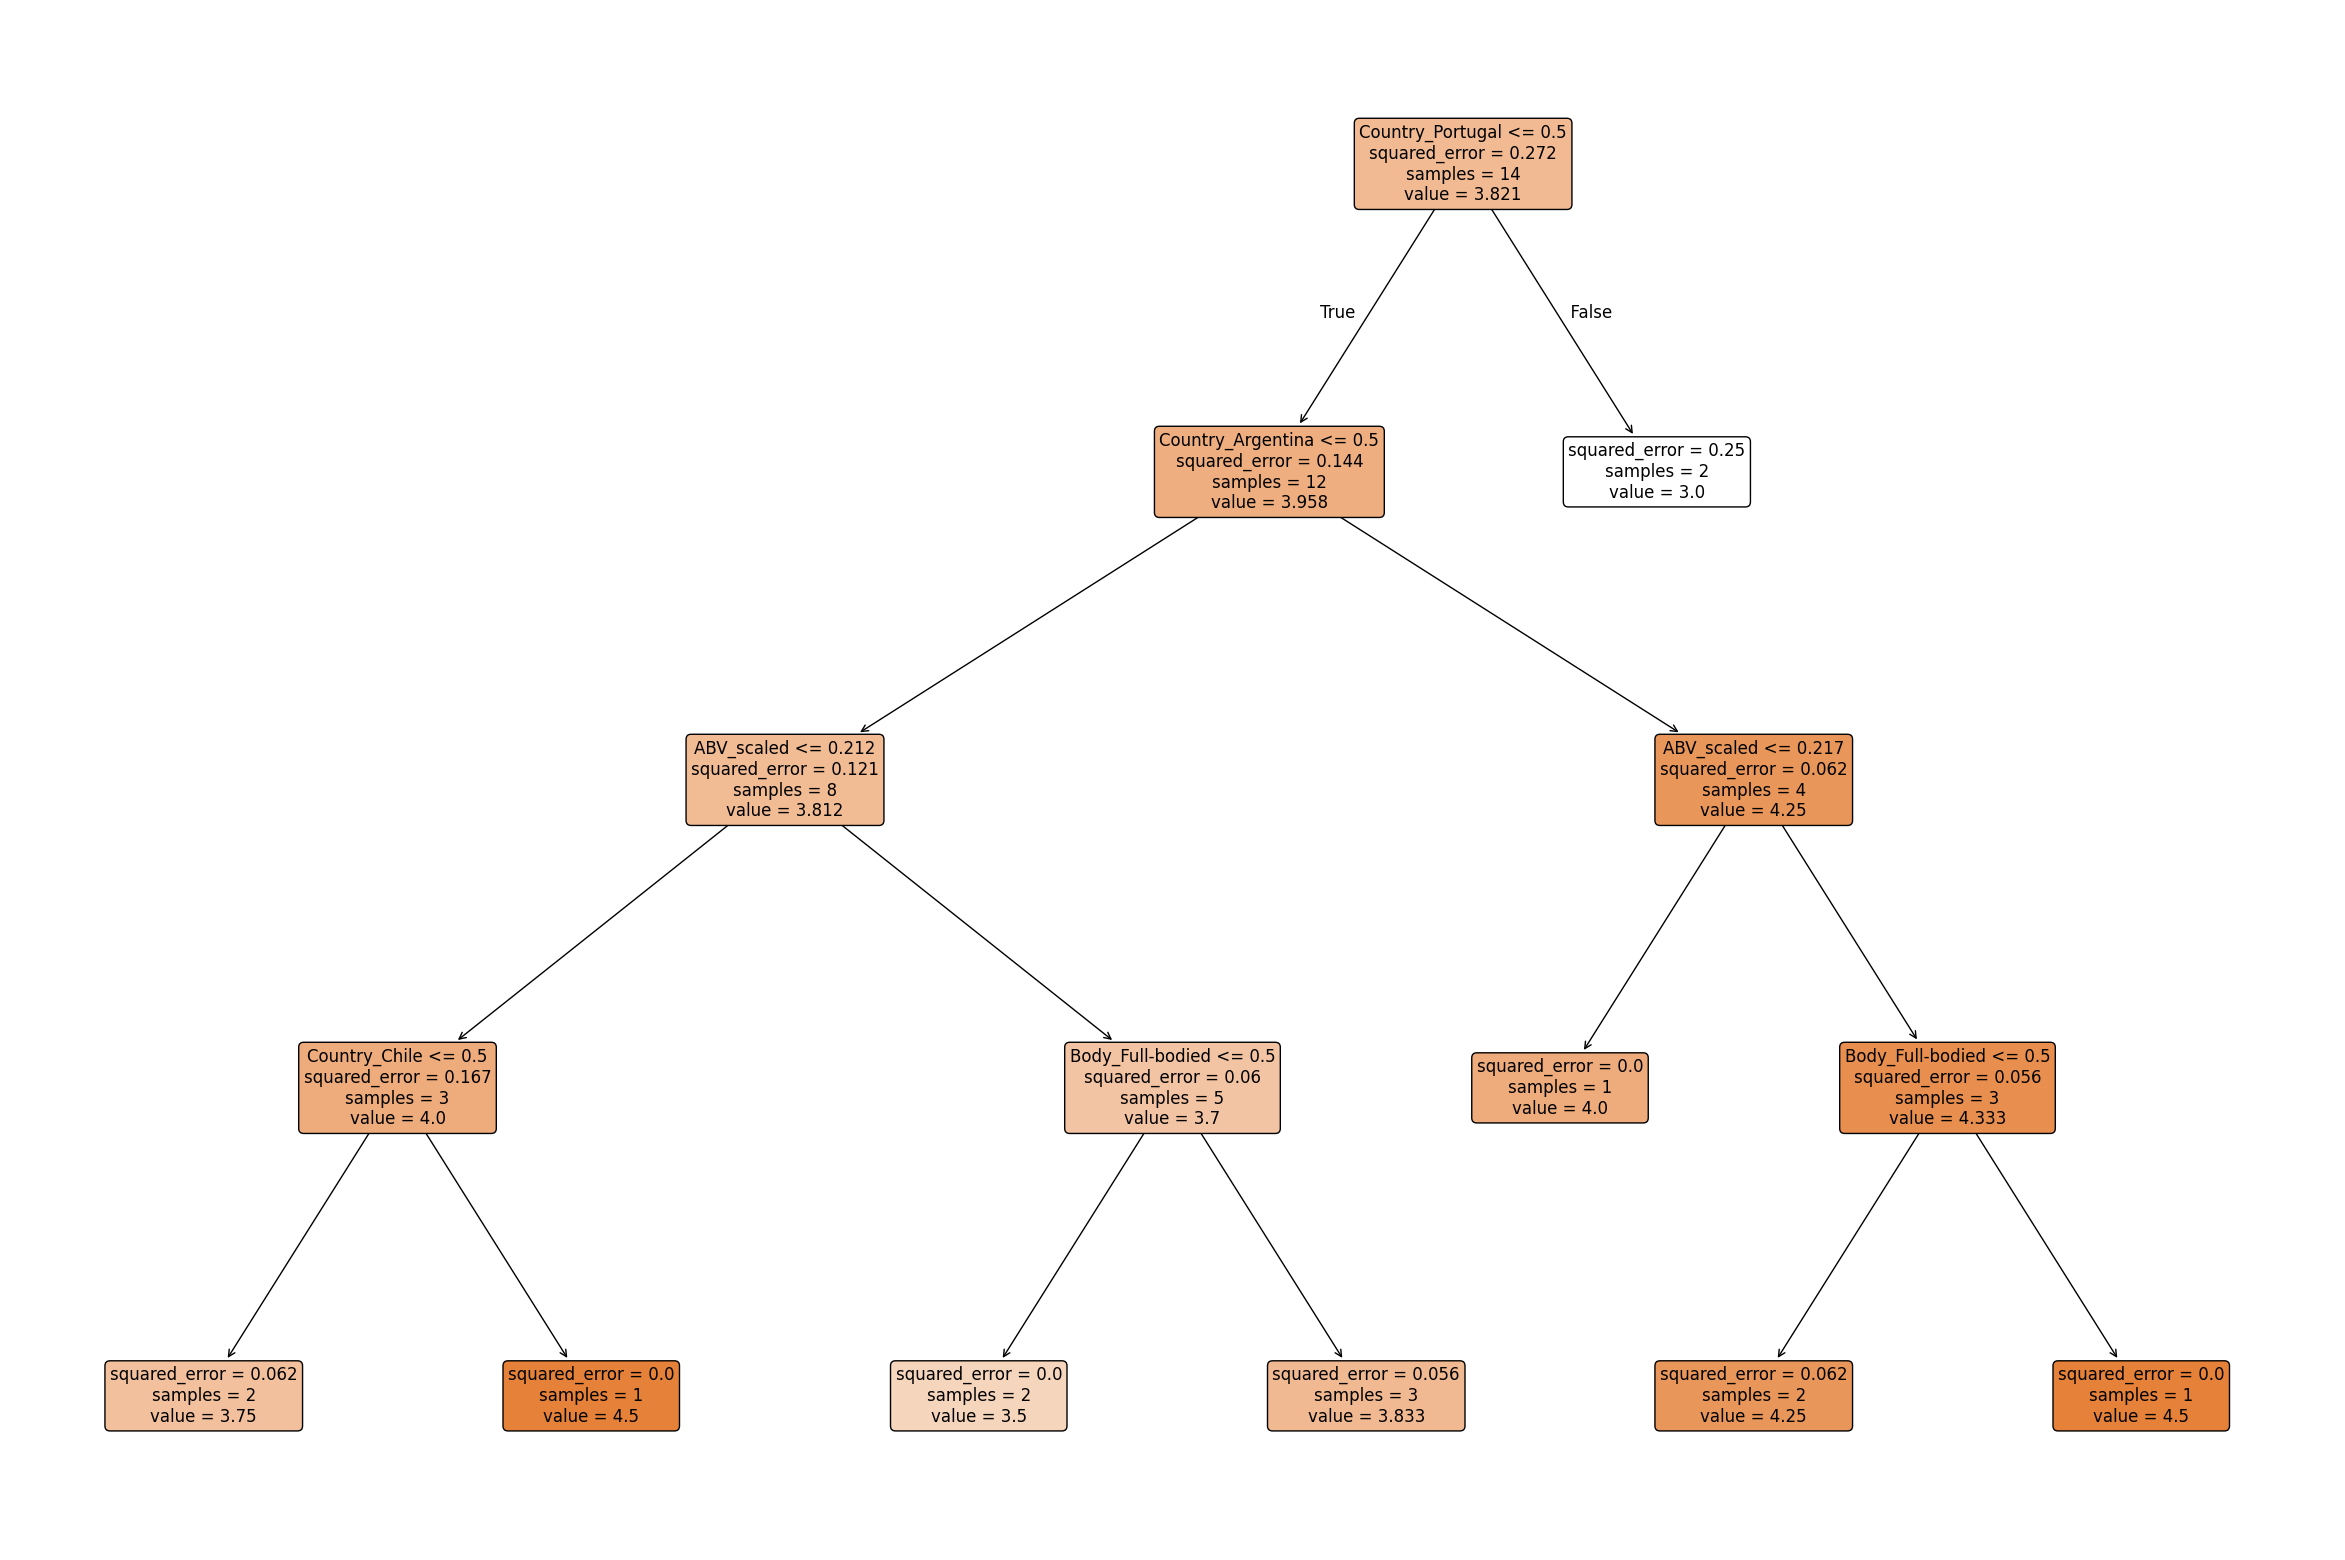

In [45]:
import matplotlib.pyplot as plt
from sklearn import tree

# Ensure that 'dt_regressor' is your trained Decision Tree Regressor
# and 'X' is your feature DataFrame used for training

# Set the figure size
plt.figure(figsize=(30, 20))

# Plot the tree
tree.plot_tree(
    dt_regressor,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=12
)

# Display the plot
plt.show()


In [46]:
# ---------------------------------------
# Step 1: Import Necessary Libraries
# ---------------------------------------
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score

# ---------------------------------------
# Step 2: Prepare the Data
# ---------------------------------------

# Assume that 'wines_df' and 'ratings_df' DataFrames are already loaded

# Ensure 'WineID' is set as the index in wines_df
if wines_df.index.name != 'WineID':
    wines_df.set_index('WineID', inplace=True)

# Select a user (using the previously selected 'random_user_id')
# If 'random_user_id' is not defined, select one
if 'random_user_id' not in locals():
    random_user_id = ratings_df['UserID'].sample(1).iloc[0]

# Get the user's ratings
user_ratings = ratings_df[ratings_df['UserID'] == random_user_id]

# Select the rated wines based on 'WineID'
rated_wines_df = wines_df.loc[user_ratings['WineID']]

# Reset index to ensure 'WineID' is a column
rated_wines_df = rated_wines_df.reset_index()

# Merge the user's ratings with the rated_wines_df
rated_wines_df = rated_wines_df.merge(user_ratings[['WineID', 'Rating']], on='WineID')

# Identify unrated wines
all_wine_ids = set(wines_df.index)
rated_wine_ids = set(rated_wines_df['WineID'])
unrated_wine_ids = list(all_wine_ids - rated_wine_ids)

# Get the unrated wines DataFrame
unrated_wines_df = wines_df.loc[unrated_wine_ids].reset_index()

# ---------------------------------------
# Step 3: Feature Selection and Encoding
# ---------------------------------------

# Define the features to use
selected_features = ['Type', 'Country', 'Body', 'Acidity', 'ABV']

# Separate categorical and numerical features
categorical_features = ['Type', 'Country', 'Body', 'Acidity']
numerical_features = ['ABV']

# Initialize OneHotEncoder for categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on all wines (to capture all possible categories)
encoder.fit(wines_df[categorical_features])

# Transform categorical features for rated and unrated wines
rated_wines_encoded_cat = encoder.transform(rated_wines_df[categorical_features])
unrated_wines_encoded_cat = encoder.transform(unrated_wines_df[categorical_features])

# Get encoded feature names
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Convert to DataFrames
rated_wines_encoded_cat = pd.DataFrame(
    rated_wines_encoded_cat,
    columns=encoded_feature_names,
    index=rated_wines_df.index
)
unrated_wines_encoded_cat = pd.DataFrame(
    unrated_wines_encoded_cat,
    columns=encoded_feature_names,
    index=unrated_wines_df.index
)

# Initialize MinMaxScaler for numerical features
scaler = MinMaxScaler()

# Fit the scaler on all wines
scaler.fit(wines_df[numerical_features])

# Scale numerical features for rated and unrated wines
rated_wines_scaled_num = scaler.transform(rated_wines_df[numerical_features])
unrated_wines_scaled_num = scaler.transform(unrated_wines_df[numerical_features])

# Convert to DataFrames
rated_wines_scaled_num = pd.DataFrame(
    rated_wines_scaled_num,
    columns=numerical_features,
    index=rated_wines_df.index
)
unrated_wines_scaled_num = pd.DataFrame(
    unrated_wines_scaled_num,
    columns=numerical_features,
    index=unrated_wines_df.index
)

# Combine encoded categorical features and scaled numerical features
rated_wines_features = pd.concat([rated_wines_encoded_cat, rated_wines_scaled_num], axis=1)
unrated_wines_features = pd.concat([unrated_wines_encoded_cat, unrated_wines_scaled_num], axis=1)

# ---------------------------------------
# Step 4: Prepare Labels for Classification
# ---------------------------------------

# Labels (convert ratings to strings for classification)
y = rated_wines_df['Rating'].astype(str)

# Features (X)
X = rated_wines_features

# Features for unrated wines
X_unrated = unrated_wines_features

# ---------------------------------------
# Step 5: Initialize and Train the Decision Tree Classifier
# ---------------------------------------

# Set max_depth to 3
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X, y)

# ---------------------------------------
# Step 6: Predict Ratings for Unrated Wines
# ---------------------------------------

predicted_ratings = dt_classifier.predict(X_unrated)

# ---------------------------------------
# Step 7: Add Predicted Ratings to Unrated Wines DataFrame
# ---------------------------------------

unrated_wines_df['PredictedRating'] = predicted_ratings

# Convert predicted ratings to float for sorting
unrated_wines_df['PredictedRating_Value'] = unrated_wines_df['PredictedRating'].astype(float)

# ---------------------------------------
# Step 8: Recommend Wines with Higher Predicted Ratings
# ---------------------------------------

# Sort the unrated wines by predicted rating in descending order
recommended_wines = unrated_wines_df.sort_values(by='PredictedRating_Value', ascending=False)

# Define the columns to display
display_columns = ['WineName', 'Type', 'Country', 'ABV', 'Body', 'Acidity', 'PredictedRating']

# Display the top 10 recommended wines
print("\nTop 10 Recommended Wines:")
display(recommended_wines[display_columns].head(10))



Top 10 Recommended Wines:


,WineName,Type,Country,ABV,Body,Acidity,PredictedRating
753,Cocodrilo Red Blend,Red,Argentina,14.50,Full-bodied,High,4.5
660,Don Nicanor Chardonnay-Viognier,White,Argentina,14.10,Medium-bodied,Medium,4.5
338,Tupungato Passo Doble Malbec-Corvina,Red,Argentina,14.50,Full-bodied,High,4.5
764,Los Cardos Malbec,Red,Argentina,14.50,Full-bodied,High,4.5
588,Sauvignon Blanc Reserve Collection Elgin,White,South Africa,13.90,Light-bodied,High,4.0
640,Vicar's Choice Sauvignon Blanc Bubbles,Sparkling,New Zealand,12.50,Full-bodied,High,4.0
843,Red Blend,Red,Argentina,13.50,Full-bodied,Medium,4.0
374,Earth Smoke Pinot Noir,Red,New Zealand,13.20,Medium-bodied,High,4.0
170,A Rosé Is A Rosé Is A Rosé,Rosé,Argentina,12.20,Medium-bodied,Medium,4.0
172,Extra Brut,Sparkling,Argentina,12.20,Medium-bodied,Medium,4.0


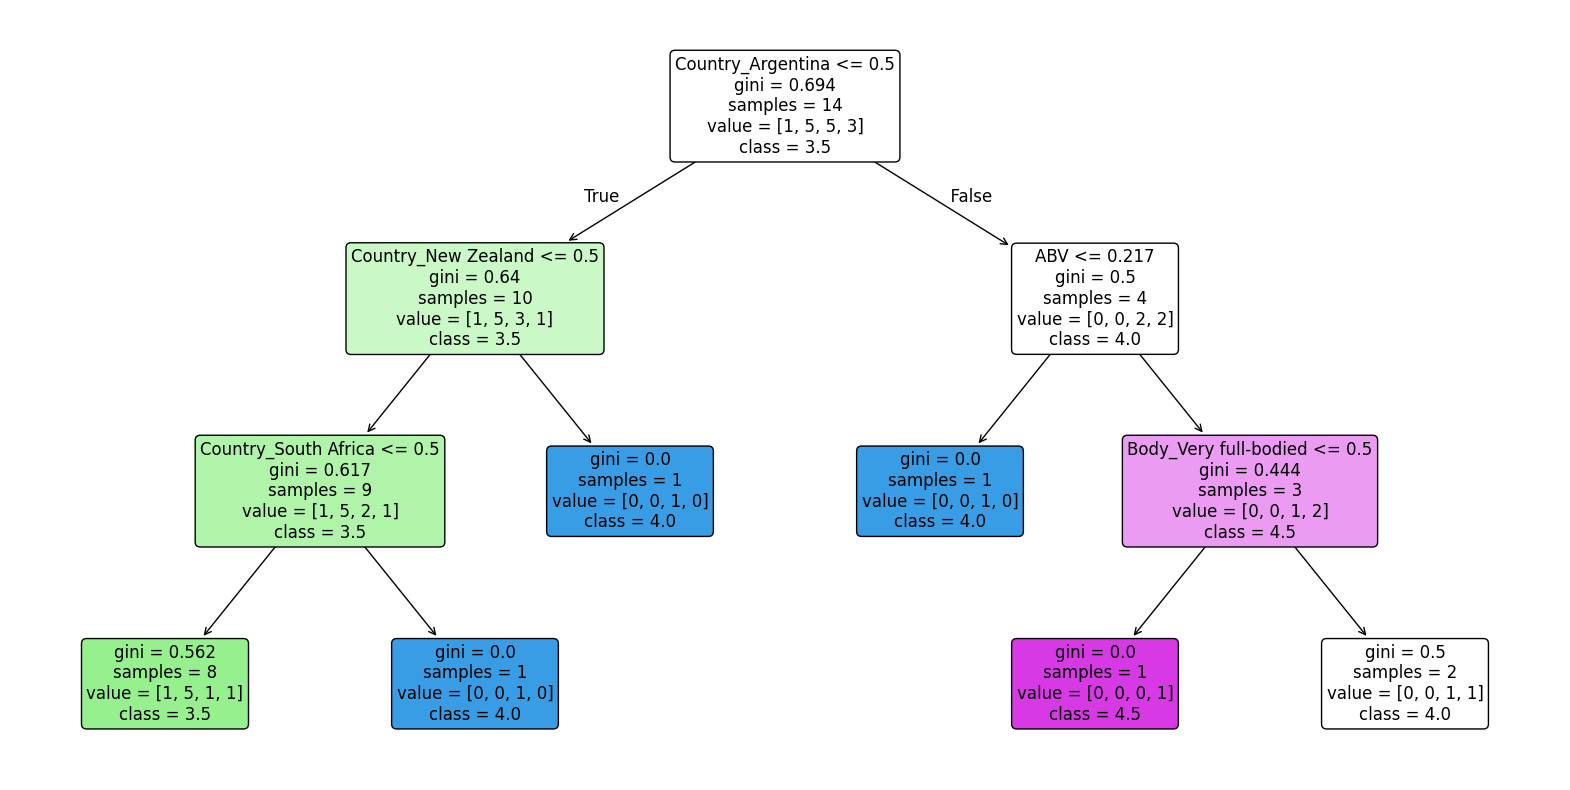

In [47]:
# Set the figure size for better readability
plt.figure(figsize=(20, 10))

# Plot the decision tree
tree.plot_tree(
    dt_classifier,
    feature_names=X.columns,          # Feature names used in training
    class_names=dt_classifier.classes_,  # Class names (unique ratings)
    filled=True,                      # Fill nodes with colors
    rounded=True,                     # Rounded nodes
    fontsize=12                       # Font size for text in the tree
)

# Display the plot
plt.show()

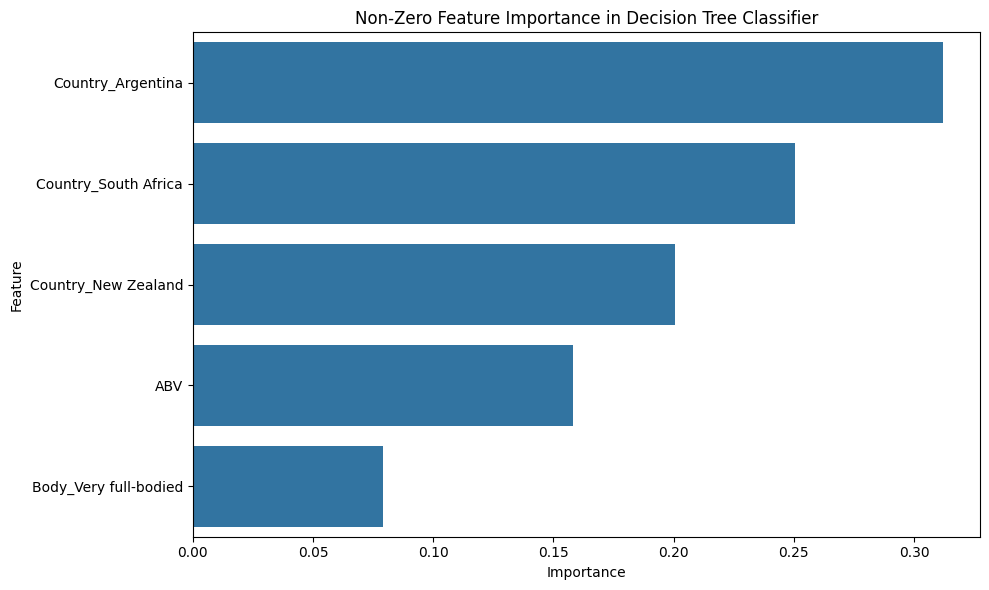

In [48]:
# ---------------------------------------
# Step 10: Plot Non-Zero Feature Importance
# ---------------------------------------

# Get the feature importances
feature_importances = dt_classifier.feature_importances_

# Create a DataFrame to hold feature names and their corresponding importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Filter out the features with zero importance
importance_df = importance_df[importance_df['Importance'] > 0]

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Non-Zero Feature Importance in Decision Tree Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# Checking the Total Number of Users and Excluding the ones with few reviews

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better plot aesthetics
sns.set(style="whitegrid")
%matplotlib inline


In [51]:
# Define the path to your ratings CSV file
ratings_file_path = 'dataset/XWines_Slim_150K_ratings.csv'

# Load the dataset
try:
    ratings_df = pd.read_csv(ratings_file_path)
    print("Dataset loaded successfully!")
    display(ratings_df.head())
except FileNotFoundError:
    print(f"Error: The file '{ratings_file_path}' was not found.")
    print("Please verify the file path and ensure the file exists.")


/var/folders/9n/hfw66rw97sl45x98mmd_vs4r0000gn/T/ipykernel_72627/258833374.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings_df = pd.read_csv(ratings_file_path)


Dataset loaded successfully!


,RatingID,UserID,WineID,Vintage,Rating,Date
0,143,1356810,103471,1950,4.50,2021-11-02 20:52:59
1,199,1173759,111415,1951,5.00,2015-08-20 17:46:26
2,348,1164877,111395,1952,5.00,2020-11-13 05:40:26
3,374,1207665,111433,1953,5.00,2017-05-05 06:44:13
4,834,1075841,111431,1955,5.00,2016-09-14 20:18:38


In [52]:
# Calculate the number of reviews per user
user_review_counts = ratings_df['UserID'].value_counts().reset_index()
user_review_counts.columns = ['UserID', 'ReviewCount']

# Display the first few rows
print("Number of Reviews per User:")
display(user_review_counts.head())


Number of Reviews per User:


,UserID,ReviewCount
0,1048267,67
1,1070878,67
2,1006657,67
3,1084433,60
4,1163129,58


In [53]:
# Descriptive statistics
descriptive_stats = user_review_counts['ReviewCount'].describe()
print("Descriptive Statistics of Reviews per User:")
print(descriptive_stats)


Descriptive Statistics of Reviews per User:
count   10561.00
mean       14.20
std         7.04
min         1.00
25%        10.00
50%        12.00
75%        17.00
max        67.00
Name: ReviewCount, dtype: float64


# Evaluating a Baseline Dumb Random Classifier

In [54]:
# Define the list of 9 possible classes as strings
class_labels = ['1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0']


In [55]:
# Define the output CSV file path
random_output_file = 'random_classifier_metrics.csv'

# Check if the file already exists to avoid overwriting
if not os.path.exists(random_output_file):
    # Initialize the CSV file with headers
    with open(random_output_file, 'w', newline='') as csvfile:
        fieldnames = ['UserID', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()


In [56]:
def evaluate_random_classifier(user_id, class_labels):
    """
    Evaluates a single user by assigning random classes and computing evaluation metrics.
    
    Parameters:
    - user_id: The unique identifier for the user.
    - class_labels: A list of all possible class labels.
    
    Returns:
    - A dictionary containing the evaluation metrics for the user.
    """
    # Filter ratings for the current user
    user_ratings = ratings_df[ratings_df['UserID'] == user_id]
    
    # Proceed only if the user has rated at least 5 wines to allow for train-test split
    if len(user_ratings) < 5:
        return None  # Not enough data to evaluate
    
    # Prepare labels (convert ratings to strings for classification)
    y = user_ratings['Rating'].astype(str)
    
    # Train-test split (80-20), stratify to handle class imbalance
    try:
        y_train, y_test = train_test_split(
            y, test_size=0.2, random_state=42, stratify=y
        )
    except ValueError:
        # Handle cases where stratify=y might fail due to insufficient class representation
        return None
    
    # Randomly assign classes to the test set with equal probability
    y_pred = np.random.choice(class_labels, size=len(y_test))
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Return the metrics
    return {
        'UserID': user_id,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }


In [57]:
# Total number of users
unique_users = ratings_df['UserID'].unique()
total_users = len(unique_users)
print(f"Total Users to Evaluate: {total_users}")

# Optionally, evaluate a sample of users first
# Uncomment the following lines to evaluate a smaller sample (e.g., 10,000 users)
#sample_size = 10000  # Adjust this number based on your testing needs
#sampled_users = np.random.choice(unique_users, size=sample_size, replace=False)
#users_to_evaluate = sampled_users
#print(f"Sampled Users to Evaluate: {len(users_to_evaluate)}")

# To evaluate all users, comment out the sampling lines above and uncomment the following line:
users_to_evaluate = unique_users


Total Users to Evaluate: 10561


In [58]:
# Open the CSV file in append mode
with open(random_output_file, 'a', newline='') as csvfile:
    fieldnames = ['UserID', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # Iterate through users with a progress bar
    for user_id in tqdm(users_to_evaluate, desc="Evaluating Users"):
        result = evaluate_random_classifier(user_id, class_labels)
        if result is not None:
            writer.writerow(result)


NameError: name 'csv' is not defined

In [ ]:
# Load the metrics into a DataFrame
random_metrics_df = pd.read_csv('random_classifier_metrics.csv')

# Display the first few rows
print("Sample of Random Classifier Evaluation Metrics:")
display(random_metrics_df.head())


Sample of Random Classifier Evaluation Metrics:


,UserID,Accuracy,Precision,Recall,F1-Score
0,1162966,0.06,0.16,0.06,0.07
1,1198326,0.07,0.23,0.07,0.11
2,1483492,0.40,0.60,0.40,0.48
3,1186724,0.11,0.37,0.11,0.16
4,1129462,0.14,0.43,0.14,0.21


In [ ]:
# Get descriptive statistics
random_general_stats = random_metrics_df.describe()
print("\nGeneral Evaluation Metrics for Random Classifier:")
print(random_general_stats)



General Evaluation Metrics for Random Classifier:
          UserID  Accuracy  Precision    Recall  F1-Score
count  187115.00 187115.00  187115.00 187115.00 187115.00
mean  1487815.74      0.11       0.18      0.11      0.13
std    317799.00      0.17       0.27      0.17      0.19
min   1000002.00      0.00       0.00      0.00      0.00
25%   1197747.50      0.00       0.00      0.00      0.00
50%   1469479.00      0.00       0.00      0.00      0.00
75%   1767117.00      0.20       0.33      0.20      0.22
max   2063389.00      1.00       1.00      1.00      1.00


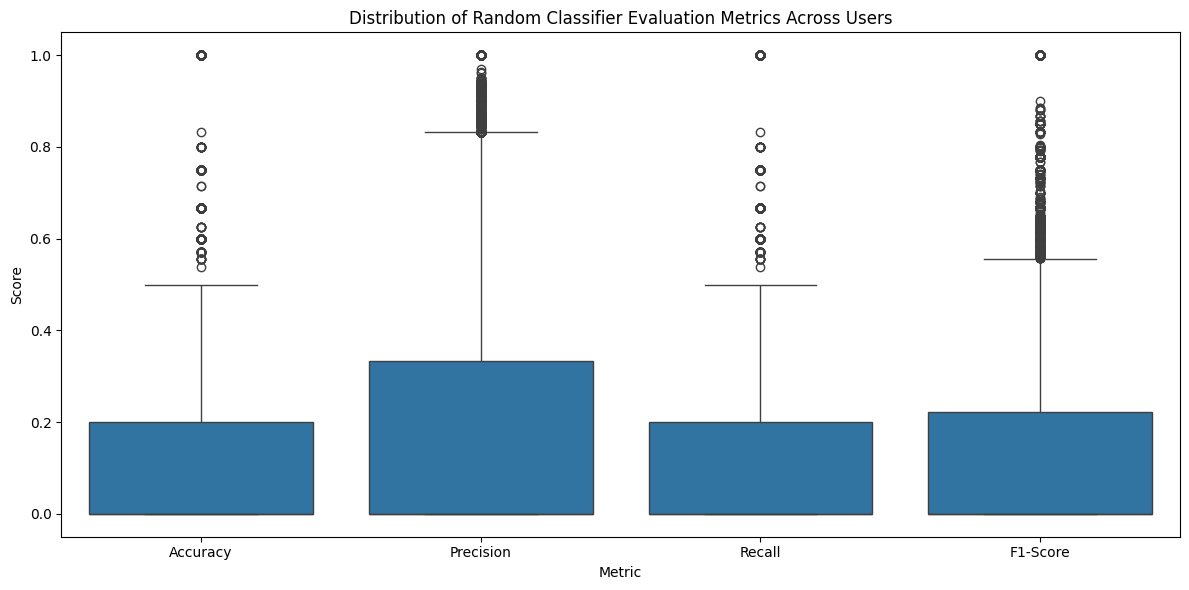

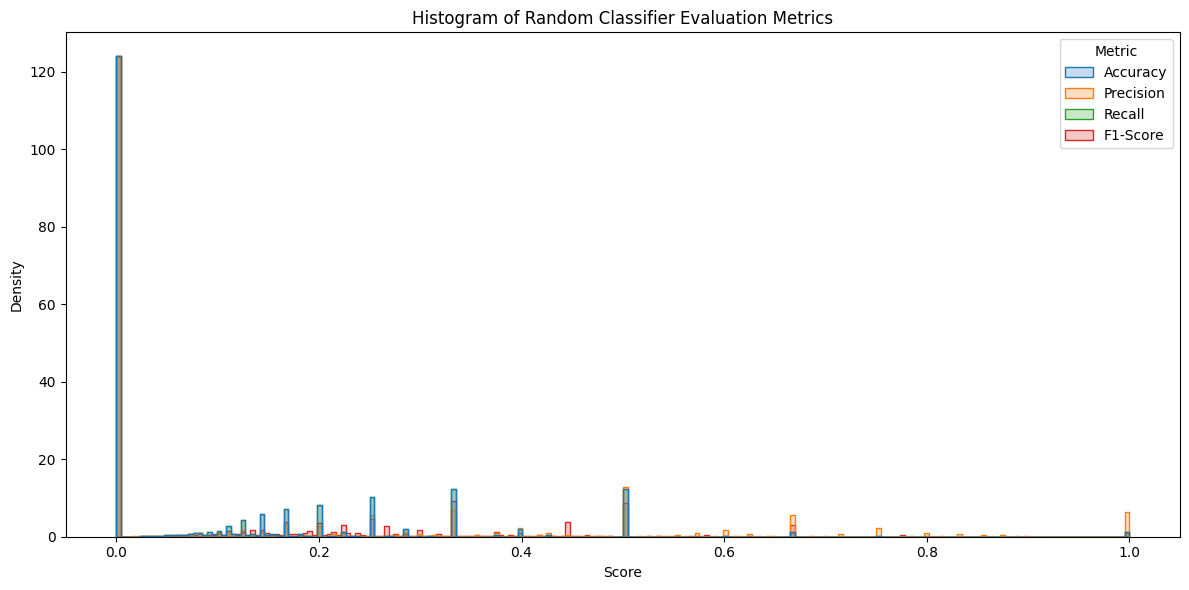

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame for easier plotting
random_metrics_melted = random_metrics_df.melt(
    id_vars='UserID',
    value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    var_name='Metric',
    value_name='Score'
)

# Plot boxplots for each metric
plt.figure(figsize=(12, 6))
sns.boxplot(x='Metric', y='Score', data=random_metrics_melted)
plt.title('Distribution of Random Classifier Evaluation Metrics Across Users')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

# Plot histograms for each metric
plt.figure(figsize=(12, 6))
sns.histplot(data=random_metrics_melted, x='Score', hue='Metric', element='step', stat='density', common_norm=False)
plt.title('Histogram of Random Classifier Evaluation Metrics')
plt.xlabel('Score')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


# Evaluating a "Smarter" Random Classifier that takes into account the Distribution of the Classes in the Training Set for the Predictions on the Test Set

# Evaluating Decision Tree Content-Based Classifier (Simple Train/Test Split Stratified)

In [59]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm  # For progress bars
import csv

# Assume 'wines_df' and 'ratings_df' are already loaded in your Jupyter Notebook

# ---------------------------------------
# Step 1: Set 'WineID' as Index in wines_df
# ---------------------------------------

if wines_df.index.name != 'WineID':
    wines_df.set_index('WineID', inplace=True)

# ---------------------------------------
# Step 2: Define Categorical and Numerical Features
# ---------------------------------------

categorical_features = ['Type', 'Country', 'Body', 'Acidity']
numerical_features = ['ABV']

# ---------------------------------------
# Step 3: Initialize and Fit Encoders and Scalers
# ---------------------------------------

# Initialize OneHotEncoder for categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(wines_df[categorical_features])

# Initialize MinMaxScaler for numerical features
scaler = MinMaxScaler()
scaler.fit(wines_df[numerical_features])


MinMaxScaler()

In [60]:
def evaluate_user(user_id):
    """
    Evaluates a single user by training a Decision Tree Classifier and computing evaluation metrics.
    
    Parameters:
    - user_id: The unique identifier for the user.
    
    Returns:
    - A dictionary containing the evaluation metrics for the user.
    """
    # Filter ratings for the current user
    user_ratings = ratings_df[ratings_df['UserID'] == user_id]
    
    # Select the rated wines based on 'WineID'
    try:
        rated_wines = wines_df.loc[user_ratings['WineID']]
    except KeyError:
        # Handle cases where WineID might not be present in wines_df
        return None
    
    # Reset index to ensure 'WineID' is a column
    rated_wines = rated_wines.reset_index()
    
    # Merge the user's ratings with the rated_wines DataFrame
    rated_wines = rated_wines.merge(user_ratings[['WineID', 'Rating']], on='WineID')
    
    # Encode categorical features
    encoded_cat = encoder.transform(rated_wines[categorical_features])
    encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_features))
    
    # Scale numerical features
    scaled_num = scaler.transform(rated_wines[numerical_features])
    scaled_num_df = pd.DataFrame(scaled_num, columns=numerical_features)
    
    # Combine encoded categorical features and scaled numerical features
    features = pd.concat([encoded_cat_df, scaled_num_df], axis=1)
    
    # Prepare labels (convert ratings to strings for classification)
    y = rated_wines['Rating'].astype(str)
    
    # Features (X)
    X = features
    
    # Train-test split (80-20), stratify to handle class imbalance
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
    except ValueError:
        # Handle cases where stratify=y might fail due to insufficient class representation
        return None
    
    # Initialize and train the Decision Tree Classifier with max_depth=3
    clf = DecisionTreeClassifier(max_depth=3, random_state=42)
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Return the metrics
    return {
        'UserID': user_id,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }


In [61]:
import os

# Define the output CSV file path
output_file = 'content_based_classifier_metrics_slim.csv'

# Check if the file already exists to avoid overwriting
if not os.path.exists(output_file):
    # Initialize the CSV file with headers
    with open(output_file, 'w', newline='') as csvfile:
        fieldnames = ['UserID', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()


In [62]:
# ---------------------------------------
# Step 5: Define the Number of Users to Evaluate
# ---------------------------------------

# Total number of users
unique_users = ratings_df['UserID'].unique()
total_users = len(unique_users)
print(f"Total Users to Evaluate: {total_users}")

# Optionally, evaluate a sample of users first
# Uncomment the following lines to evaluate a smaller sample (e.g., 10,000 users)
# sample_size = 10000
# sampled_users = np.random.choice(unique_users, size=sample_size, replace=False)
# users_to_evaluate = sampled_users
# print(f"Sampled Users to Evaluate: {len(users_to_evaluate)}")

# To evaluate all users, comment out the sampling lines above
users_to_evaluate = unique_users


Total Users to Evaluate: 10561


In [63]:
# ---------------------------------------
# Step 6: Iterate Through Users and Evaluate
# ---------------------------------------

# Open the CSV file in append mode to write results incrementally
with open(output_file, 'a', newline='') as csvfile:
    fieldnames = ['UserID', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # Iterate through users with a progress bar
    for user_id in tqdm(users_to_evaluate, desc="Evaluating Users"):
        result = evaluate_user(user_id)
        if result is not None:
            writer.writerow(result)


Evaluating Users:   0%|          | 0/10561 [00:00<?, ?it/s]

Evaluating Users: 100%|██████████| 10561/10561 [00:25<00:00, 415.92it/s]


In [64]:
# ---------------------------------------
# Step 7: Load Metrics from CSV
# ---------------------------------------

# Load the metrics into a DataFrame
metrics_df = pd.read_csv(output_file)

# Display the first few rows
print("Sample of Evaluation Metrics:")
display(metrics_df.head())


Sample of Evaluation Metrics:


,UserID,Accuracy,Precision,Recall,F1-Score
0,1173759,0.33,0.21,0.33,0.23
1,1147051,0.50,0.25,0.50,0.33
2,1174133,0.33,0.17,0.33,0.22
3,1196521,0.00,0.00,0.00,0.00
4,1182360,0.50,0.25,0.50,0.33


In [65]:
# ---------------------------------------
# Step 8: Compute General Statistics
# ---------------------------------------

# Get descriptive statistics
general_stats = metrics_df.describe()
print("\nGeneral Evaluation Metrics:")
print(general_stats)



General Evaluation Metrics:
          UserID  Accuracy  Precision  Recall  F1-Score
count    1717.00   1717.00    1717.00 1717.00   1717.00
mean  1258423.00      0.46       0.38    0.46      0.40
std    230634.32      0.28       0.31    0.28      0.28
min   1000049.00      0.00       0.00    0.00      0.00
25%   1109124.00      0.25       0.13    0.25      0.17
50%   1215960.00      0.50       0.33    0.50      0.33
75%   1308132.00      0.67       0.50    0.67      0.56
max   2062618.00      1.00       1.00    1.00      1.00


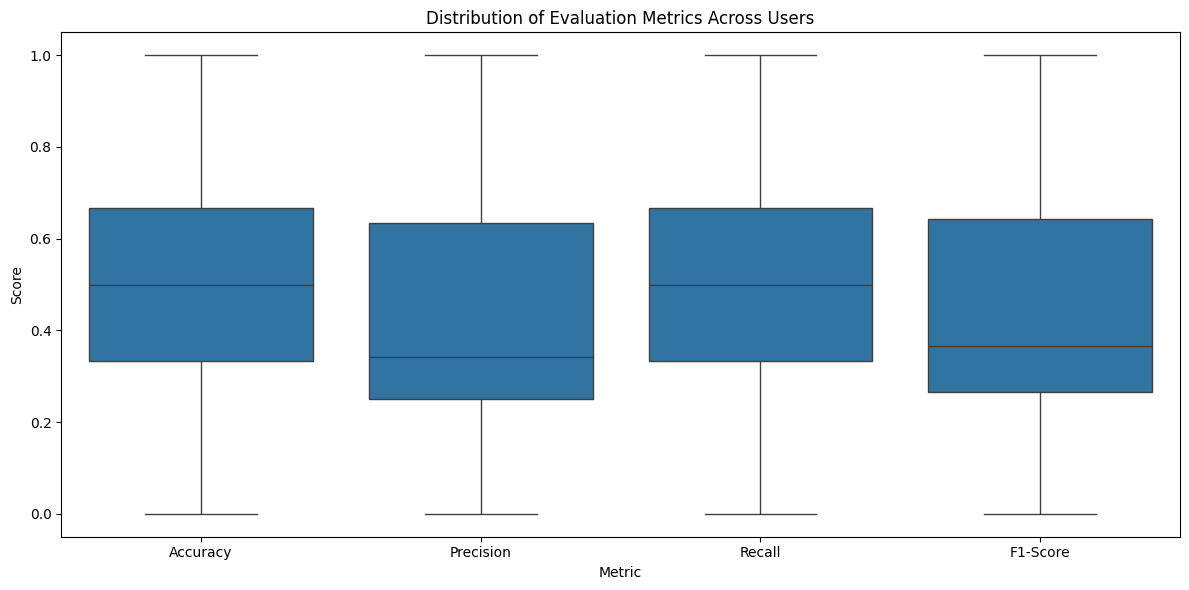

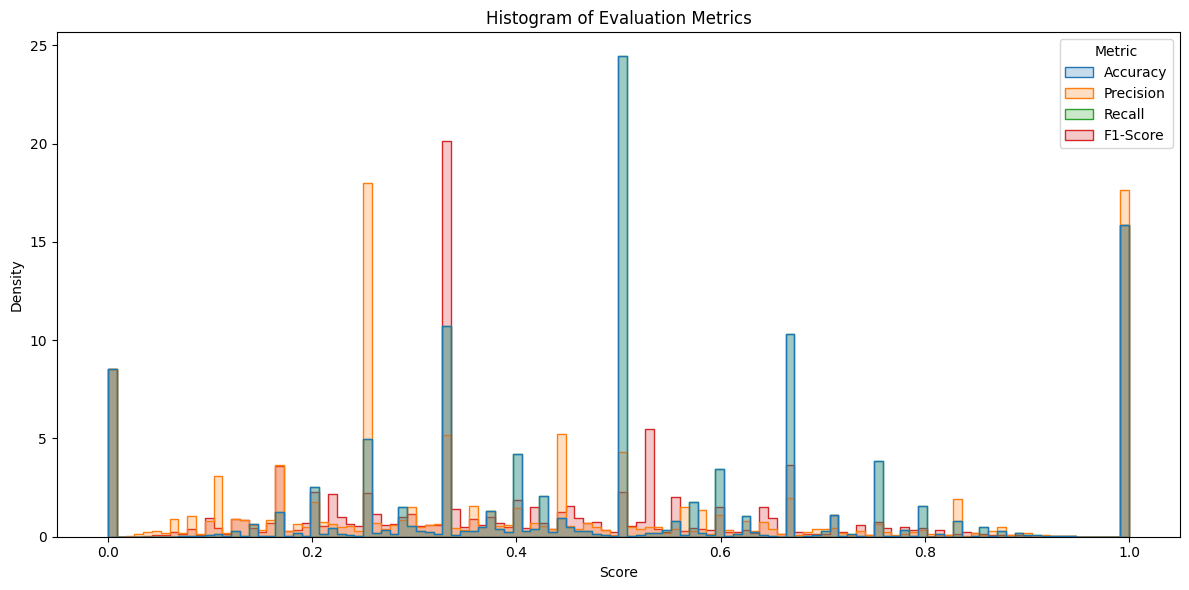

In [ ]:
# ---------------------------------------
# Step 9: Visualize the Distribution of Metrics
# ---------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame for easier plotting
metrics_melted = metrics_df.melt(
    id_vars='UserID',
    value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    var_name='Metric',
    value_name='Score'
)

# Plot boxplots for each metric
plt.figure(figsize=(12, 6))
sns.boxplot(x='Metric', y='Score', data=metrics_melted)
plt.title('Distribution of Evaluation Metrics Across Users')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

# Plot histograms for each metric
plt.figure(figsize=(12, 6))
sns.histplot(data=metrics_melted, x='Score', hue='Metric', element='step', stat='density', common_norm=False)
plt.title('Histogram of Evaluation Metrics')
plt.xlabel('Score')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


In [ ]:
# ---------------------------------------
# Step 10: Additional Analysis (Optional)
# ---------------------------------------

# Example: Compute mean and standard deviation for each metric
metric_means = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].mean()
metric_stds = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].std()

print("\nMean of Evaluation Metrics:")
print(metric_means)

print("\nStandard Deviation of Evaluation Metrics:")
print(metric_stds)



Mean of Evaluation Metrics:
Accuracy    0.52
Precision   0.44
Recall      0.52
F1-Score    0.46
dtype: float64

Standard Deviation of Evaluation Metrics:
Accuracy    0.27
Precision   0.31
Recall      0.27
F1-Score    0.29
dtype: float64
